# Quantum States and Qubits

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [6]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

## Single Qubit Gates

Representation of Qubits in the Bloch sphere

$$
|q\rangle = \cos \frac{\theta}{2} |0\rangle + e^{i\phi} \sin \frac{\theta}{2} |1\rangle
$$


In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

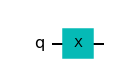

In [17]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

/Users/cheng/code/envs/qc_env/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/Users/cheng/code/envs/qc_env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


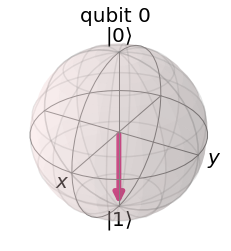

In [18]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [19]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

/Users/cheng/code/envs/qc_env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

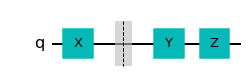

In [20]:
qc.y(0)
qc.z(0)
qc.draw(output='mpl')

### The Hadamard Gate

In [21]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

/Users/cheng/code/envs/qc_env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

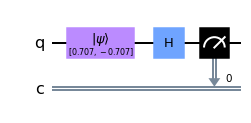

In [22]:
def x_measurement(qc, qubit, cbit):
    """ Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1 / sqrt(2), - 1 / sqrt(2)]
# Initialize qubit
qc = QuantumCircuit(1, 1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)
qc.draw(output='mpl')

/Users/cheng/code/envs/qc_env/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


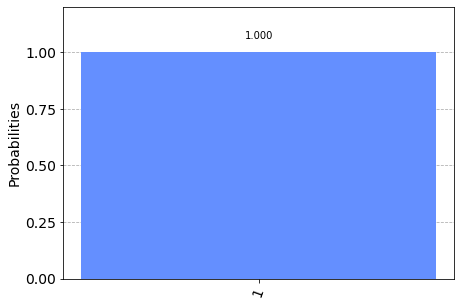

In [23]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

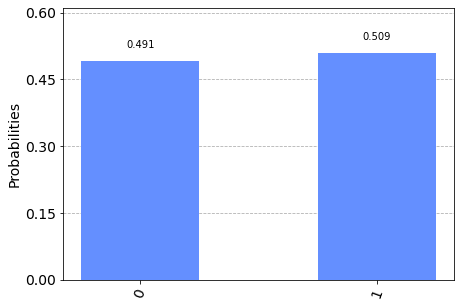

In [24]:
initial_state = [1, 0]
# Initialize qubit
qc = QuantumCircuit(1, 1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

### The P-gate

In [25]:
gate_demo(gates='pauli+h+p')

/Users/cheng/code/envs/qc_env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

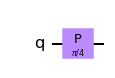

In [26]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw(output='mpl')

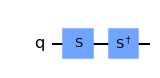

In [28]:
qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)
qc.draw(output='mpl')

In [29]:
import qiskit.tools.jupyter
%qiskit_version_table

/Users/cheng/code/envs/qc_env/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


## The Case for Quantum